# Current Visualization Offerring

This is a Reagent Analytics project demo, using the API, to answer questions about foreign influence in various entities in the Harbor open source project.

The `reagentpy` Python package facilitates use of the [Reagent API](https://api.reagentanalytics.com) and querying the Reagent version control intelligence database.

## Import the `Reagent` object

In [1]:
from reagentpy import Reagent

Check the status of the connection.

In [2]:
Reagent().status().dict()

{'status': 'ok'}

Set all required variable names to appropriately constrain query results.  We're going to show what we can do with Harbor for now, but these visualizations should work for all repositories.

In [3]:
repo_name = "goharbor/harbor"
limit = 50
china_tz = 8.0

# Non-Adversarial Threat

There are a number of human factors that influence the likelihood that vulnerabilities are injected into repositories at various points in the open source lifecycle.  These can be used to infer threat that can be quantified, and thus analyzed.  These metrics are all on a sliding scale between from **0 - 10**, 0 meaning that Harbor is unaffected by this issue, and 10 meaning that that all commits exhibit the problem at hand.

## Threatscoring Breakdown

**Project Fragmentation** is defined as the ratio of files within a repository edited by more than ten developers to files within a repository edited by less than ten developers.  The significance factor for this function is **r = 16**.

**Unfocused Contribution** is measured by taking the average pagerank of each file within a repo.  The significance factor for this function is **r = .4497**.

**Context Switching** is calculated by taking the average weekly density of distinct file communities users commit to each week.  The significance factor for this function is **r = 0.17**.

**Interactive Churn** is the average weekly number of user interactions a file has, scaled by how recent each action is.  The significance factor for this function is **r = 0.16**.

In [4]:
Reagent().enrichments().threat_score(repo_name).df()

,interactive_churn_score,context_switching_score,project_fragmentation_score,unfocused_contribution_score
0,0.16,0.0,0.151283,0.258025


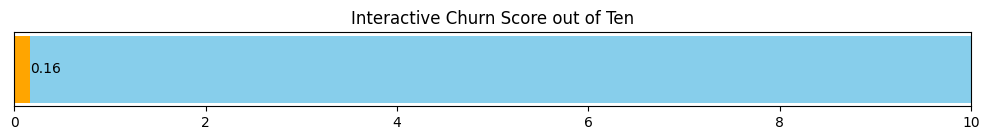

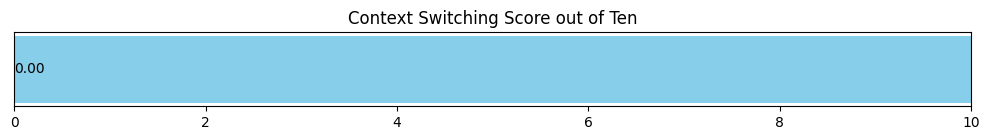

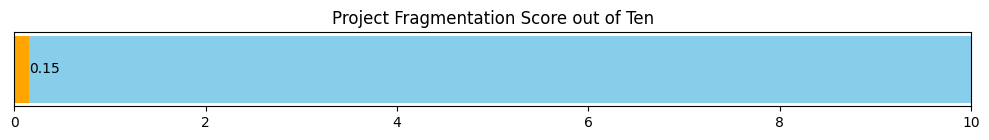

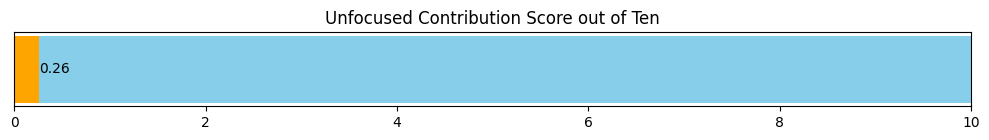

In [5]:
Reagent().demo_visualizations().create_out_of_ten_chart(repo_name)

## What organizations are involved?  What are the affiliations of those organizations?

Analyzing email domains found in the repo yeilds a glimpse into the organizations who are interested in using Harbor.

In [6]:
response = Reagent().repo().email_domains(repo_name)
response.df()

,repo_name,domain,instances,timezones
0,ansible/ansible,gmail.com,2107,"[-4.0, -7.0, 2.0, 8.0, 1.0, 3.0, -5.0, -3.0, 1..."
1,torvalds/linux,gmail.com,1656,"[-6.0, 9.0, -8.0, -7.0, -4.0, 2.0, -0.0, 3.0, ..."
2,ansible/ansible,users.noreply.github.com,1314,"[8.0, -10.0, -5.0, 1.0, -8.0, -4.0, 2.0, 3.0, ..."
3,petrussola/material-ui,gmail.com,859,"[7.0, 10.0, 3.0, 2.0, -4.0, -7.0, -6.0, -5.0, ..."
4,microsoft/vcpkg,gmail.com,751,"[-5.0, 2.0, -7.0, 25200, -3.0, 1.0, -4.0, 7200..."
5,microsoft/vcpkg,users.noreply.github.com,650,"[-7200, -25200, -36000, 25200, -3600, -10800, ..."
6,K3ysTr0K3R/metasploit-framework,gmail.com,464,"[-5.0, -0.0, 2.0, 4.0, -4.0, 5.5, 9.0, -6.0, 1..."
7,None,google.com,387,"[-7.0, -0.0, -8.0, 1.0, 2.0, -4.0, 8.0, -5.0, ..."
8,petrussola/material-ui,users.noreply.github.com,327,"[-0.0, 2.0, -8.0, -7.0, 1.0, -4.0, -6.0, 5.0, ..."
9,torvalds/linux,intel.com,300,"[-7.0, -8.0, 8.0, -4.0, 3.0, 1.0, -5.0, -0.0, ..."


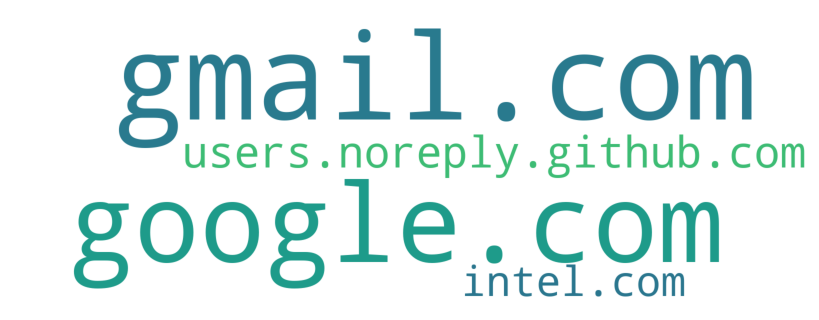

In [7]:
Reagent().demo_visualizations().wordcloud(response)

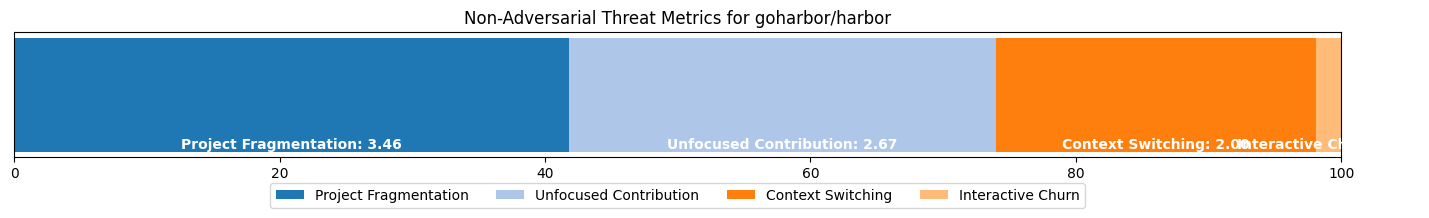

In [8]:
Reagent().demo_visualizations().threat_summary_horizontal_bar_chart(repo_name)

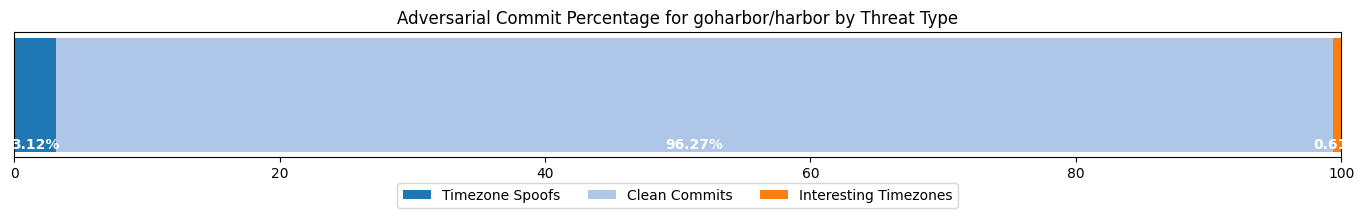

In [9]:
Reagent().demo_visualizations().threat_summary_horizontal_bar_chart(repo_name, adversarial=True)

Reading timezone geo data...
  Reading timezones from combined-now.json...  Finished in 3.10 seconds.
Plotting timezone map...


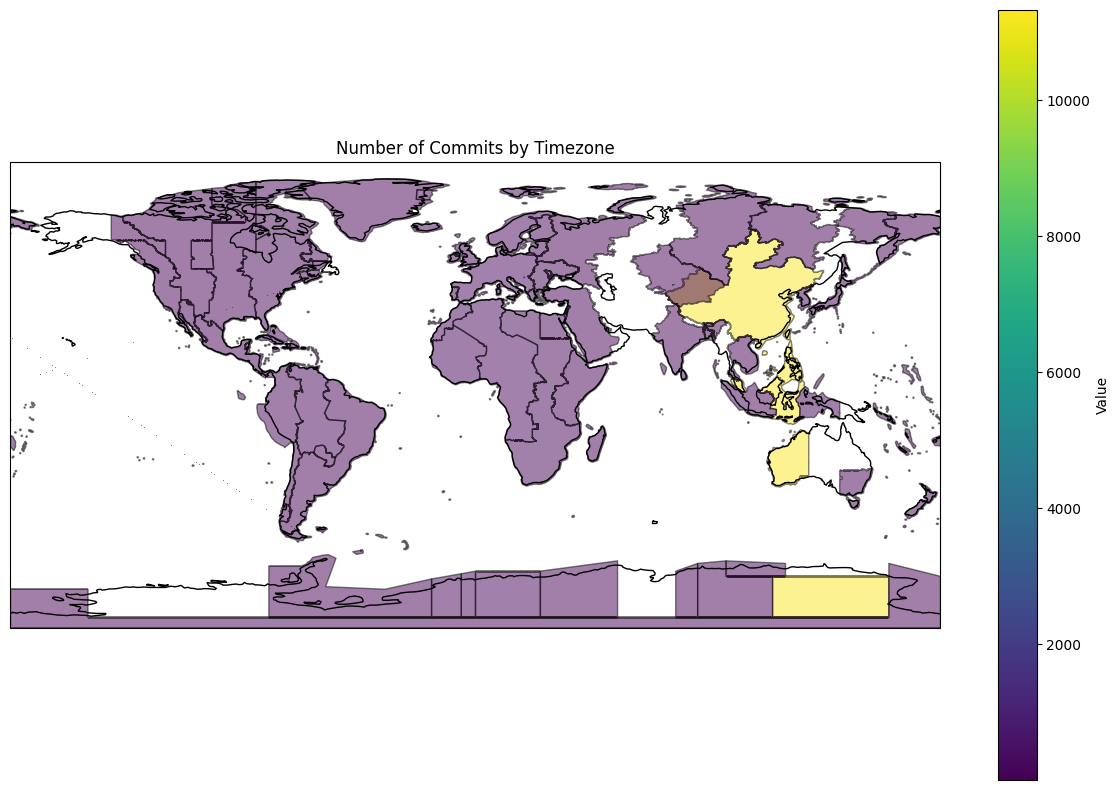

In [10]:
Reagent().timezone_visualizations().build_and_show_timezone_map(repo_name)

# Adversarial Risk

Describes deliberate attacks by bad actors with intent, capability, and targeting characteristics of any scale.  While all kinds of risk are invaluable in deciding how "safe" a resource is to use, adversarial risk serves as the best way to quantify sources of attack.

### Timezones

Often, one can deduce national origin by simply looking at timezones.  This is helpful when analyzing entities that aren't large or old enough to have country data associated with it.  Here's the breakdown for this repo according to timezones.

In [11]:
Reagent().repo().timezones(repo_name).df()

,repo_name,total_commits,tags,timezone_commit_totals
0,goharbor/harbor,12167,"[#OpenSource, #Trusted, #CloudNative, #Registr...","[{'timezone': 8.0, 'total_commits': 11327}, {'..."


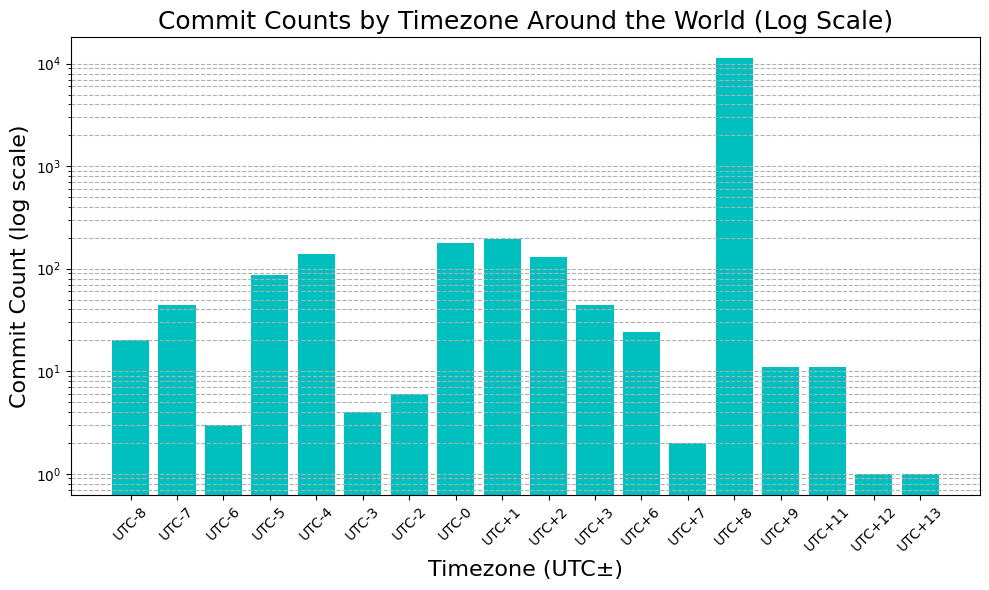

In [12]:
Reagent().timezone_visualizations().show_logarithmic_bar_chart(repo_name)